In [53]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter, defaultdict

%matplotlib inline

In [54]:
with open('input/human_delta_data.pickle', 'rb') as fh:
    x, y, tf_list = pickle.load(fh)

In [55]:
df = pd.DataFrame(np.sum(x, axis=1), columns=['delta feature sum'])

In [56]:
df['delta psi'] = y

In [57]:
counter = Counter(df['delta feature sum'])

In [58]:
array_len = counter.most_common()[0][1]

In [59]:
boxplot_data = []
for ind_counter, i in enumerate(sorted(counter)):
    data = np.asarray(df['delta psi'].loc[(df['delta feature sum'] == i)])
    arr = np.zeros(array_len, dtype=np.float16)
    arr[:] = np.nan
    for ind_data, j in enumerate(data):
        arr[ind_data] = j
    boxplot_data.append(arr)

/usr/lib/python3/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


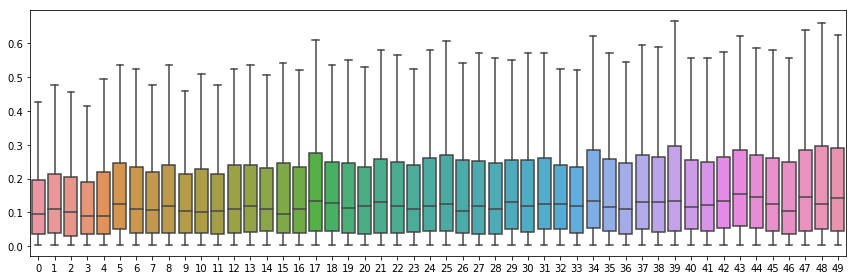

In [60]:
fig = plt.figure(figsize=(12.0, 4.0))
sns.boxplot(data=boxplot_data[0:50], orient='v', showfliers=False)
fig.tight_layout()
plt.savefig('box_plot.png', dpi=300)